# ***Hedef Degisken ve Ozellikler Arasindaki Iliski***

***Hava durumu modeli***

Bu alıştırmada, sıcaklık verileriyle çalışacaksınız. İlk olarak, sıcaklık verilerini [Kaggle](https://www.kaggle.com/budincsevity/szeged-weather/data)'dan indirin.

- Hedef değişkeninizin görünür sıcaklık ve sıcaklık arasındaki fark olduğu doğrusal bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem ve rüzgar hızı kullanın. 

- Şimdi, modelinizi OLS kullanarak tahmin edin. Tahmin edilen katsayılar istatistiksel olarak anlamlı mıdır? Tahmini katsayılar önceki beklentileriniz doğrultusunda mı? Tahmin edilen katsayıları yorumlayınız. Hedef ve açıklayıcı değişkenler arasındaki ilişkiler nelerdir?

- Ardından, yukarıdaki modele nem ve rüzgar hızı etkileşimini dahil edin ve OLS'yi kullanarak modeli tahmin edin. Katsayılar istatistiksel olarak anlamlı mıdır? Nem ve rüzgar hızı için tahmini katsayıların işaretleri değişti mi? Tahmin edilen katsayıları yorumlayınız.

---

In [1]:
import pandas as pd
import numpy as np
# grafiksel araclar
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn import linear_model
import statsmodels.api as sm

# uyarilari dikkate alma
import warnings
warnings.filterwarnings('ignore')

# pandas varsayilan olarak cok sayida sutun veya satir varsa tumunu gostermez
# bu nedenle 100 sutun ve satir gostermesi icin
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# virgulden sonra belirli sayida basamak gosterimi icin 
pd.options.display.float_format = '{:,.3f}'.format

# font tanimlamalari
title_font = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 14}
axis_font  = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 14}

# temiz veri setini dataframe icerisine yukle
weather = pd.read_csv('data/weatherHistory.csv')

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


***Tahmin modeli***
- Hedef değişkenimiz: Temperature (C) - Apparent Temperature (C)  (aradaki fark) 
- Açıklayıcı değişkenler: Humidity, Wind Speed (km/h)

In [19]:
weather['Temp_Diff'] = weather['Temperature (C)'] - weather['Apparent Temperature (C)'] 

variables = ['Humidity', 'Wind Speed (km/h)']

weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Temp_Diff
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,"1,015.130",Partly cloudy throughout the day.,2.083
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,"1,015.630",Partly cloudy throughout the day.,2.128
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,"1,015.940",Partly cloudy throughout the day.,0.000
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,"1,016.410",Partly cloudy throughout the day.,2.344
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,"1,016.510",Partly cloudy throughout the day.,1.778


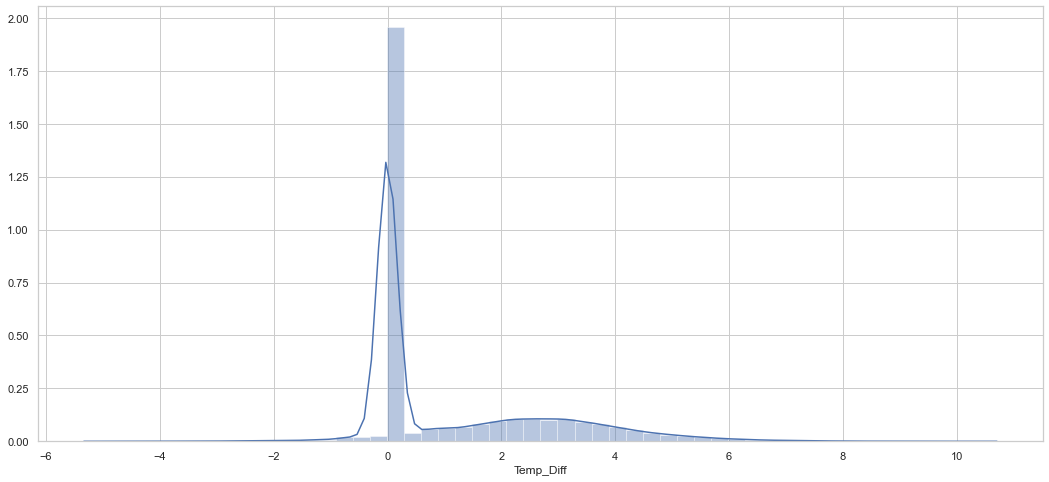

In [20]:
plt.figure(figsize=(18,8))
x = sns.distplot(weather['Temp_Diff'])

In [21]:
# hedef degiskeni
Y = weather['Temp_Diff']
# aciklayici degiskenler
X = weather[variables]

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Temp_Diff   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Fri, 10 Apr 2020   Prob (F-statistic):               0.00
Time:                        09:00:36   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4381      0.021   -115.948      0.000      -2.479      -2.397
Humidity              3.0292      0.024    126.479      0.000       2.982       3.076
Wind Speed (km/h)     0.1193      0.001    176.164      0.000       0.118       0.121
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Tahmin edilen katsayılar istatistiksel olarak anlamlı mıdır? Tahmini katsayılar önceki beklentileriniz doğrultusunda mı? Tahmin edilen katsayıları yorumlayınız. Hedef ve açıklayıcı değişkenler arasındaki ilişkiler nelerdir?

---

- Sicaklik ile hissedilen sicaklik arasindaki fark nem ve ruzgar hizina bagli degisiyor ancak modelim hedef degiskendeki varyansin yalnizca %28 ini aciklayabiliyor (```R-squared=0.288```), daha yuksek bir sonuc beklerdim.

- Aciklayici degiskenlerin p degerleri cok dusuk yani bu degiskenler istatistiksel olarak anlamli ancak nem katsayisi 3.02 iken ruzgar hizi katsayisinin 0.11 olmasi dusundurucu. Burada nem degerlerinin 0-1 arasinda olmasinin payi var. Cunku nem 0.10 artmasi aslinda nemon %10 artmasi demek ancak nemin %10 artisi farka 0.3 C etki ediyor. Ruzgar hizinin 10 km artisi ise 1.1 C etki ediyor.

***Etkilesimli degiskenlerle tahmin modeli***

- Hedef değişkenimiz: Temperature (C) - Apparent Temperature (C)  (aradaki fark) 
- Açıklayıcı değişkenler: Humidity, Wind Speed (km/h), Humidity * Wind Speed (km/h)

In [22]:
weather['Temp_Diff'] = weather['Temperature (C)'] - weather['Apparent Temperature (C)'] 

weather['Humidity_Wind_Speed'] = weather['Humidity'] * weather['Wind Speed (km/h)']

variables = ['Humidity', 'Wind Speed (km/h)', 'Humidity_Wind_Speed']

weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Temp_Diff,Humidity_Wind_Speed
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,"1,015.130",Partly cloudy throughout the day.,2.083,12.567
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,"1,015.630",Partly cloudy throughout the day.,2.128,12.268
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,"1,015.940",Partly cloudy throughout the day.,0.000,3.496
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,"1,016.410",Partly cloudy throughout the day.,2.344,11.706
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,"1,016.510",Partly cloudy throughout the day.,1.778,9.167


In [23]:
# hedef degiskeni
Y = weather['Temp_Diff']
# aciklayici degiskenler
X = weather[variables]

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Temp_Diff   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Fri, 10 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:01:52   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0839      0.033     -2.511      0.012      -0.149      -0.018
Humidity               -0.1775      0.043     -4.133      0.000      -0.262      -0.093
Wind Speed (km/h)      -0.0905      0.002    -36.797      0.000      -0.095      -0.086
Humidity_Wind_Speed     0.2971      0.003     88.470      0.000       0.291       0.304
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Katsayılar istatistiksel olarak anlamlı mıdır? Nem ve rüzgar hızı için tahmini katsayıların işaretleri değişti mi? Tahmin edilen katsayıları yorumlayınız.

---
- Katsayilarin p degerleri sifira yakin oldugundan istatistiksel olarak anlamlidir. 
- R kare degerimiz (hedef degiskenin varyansini aciklama yuzdesi) %28 den %34 e yukseldi.
- Nem ve ruzgar hizi katsayilari negatif oldu.
- Nem %10 arttiginda sicaklik farkina etkisi -0.017 C, ruzgar hizi 10 km arttiginda sicaklik farkina etkisi -0.9 C, bu iki degisken bu deger artislariyle etkilesime girdiginde ise yani etkilesimli degisken 1 (0,1 nem * 10 ruzgar hizi) arttiginda sicaklik farkina etkisi 0.29 C olmaktadir.
